# Test for LSTM Model


In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np


from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [2]:
from Data_Collect_32.process_data.data_pipeline import PandasDataPipeline
from Data_Collect_32.process_data.data_cleaning import collect_data, round_label, extract_y, drop_columns, make_group, check_is_in_time, add_index
from Data_Collect_32.process_data.dataset import Dataset
from Data_Collect_32.process_data.data_splitter import data_splitter




In [3]:
full_data_pipeline = PandasDataPipeline([round_label, check_is_in_time, extract_y,make_group,  drop_columns, add_index])


In [4]:
def load_data():
    return collect_data('..\data/Data_collect_32.csv' )

In [5]:
dataset = Dataset.create_from_pipeline(data_loading_function=load_data, data_pipeline=full_data_pipeline, data_splitter=data_splitter)

AssertionError: 

In [ ]:
dataset.y[dataset.y != 0]

1       1
3       1
4       1
5       1
11      1
       ..
9031    1
9032    1
9033    1
9034    1
9035    1
Name: y, Length: 4441, dtype: int64

In [ ]:
col_to_drop = ['Group_column', 'index', 'level_0', 'is_in_time',]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier( l2_regularization = 20,class_weight='balanced', scoring = 'average_precision').fit(dataset.X_train.drop(columns=col_to_drop), dataset.y_train)
clf.score(dataset.X_test.drop(columns=col_to_drop), dataset.y_test)


0.4832175925925926

In [ ]:
precision_score(dataset.y_train, clf.predict(dataset.X_train.drop(columns = col_to_drop)))

0.8844339622641509

In [ ]:
from sklearn.metrics import roc_auc_score
roc_test = roc_auc_score(dataset.y_test, clf.predict_proba(dataset.X_test.drop(columns = col_to_drop)).T[1])
precision_test = precision_score(dataset.y_test, clf.predict(dataset.X_test.drop(columns = col_to_drop)))

print(f'roc_test: {roc_test}')
print(f'precision_test: {precision_test}')

roc_test: 0.48936612279695235
precision_test: 0.4669260700389105


In [ ]:

roc_oot = roc_auc_score(dataset.y_oot, clf.predict_proba(dataset.X_oot.drop(columns = col_to_drop)).T[1])
precision_oot = precision_score(dataset.y_oot, clf.predict(dataset.X_oot.drop(columns = col_to_drop)))

print(f'roc_oot: {roc_oot}')
print(f'precision_oot: {precision_oot}')

roc_oot: 0.44639083637799937
precision_oot: 0.52


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(dataset.y_oot, clf.predict(dataset.X_oot.drop(columns=col_to_drop)))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm = confusion_matrix(dataset.y_oot, clf.predict(dataset.X_oot.drop(columns=col_to_drop)))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

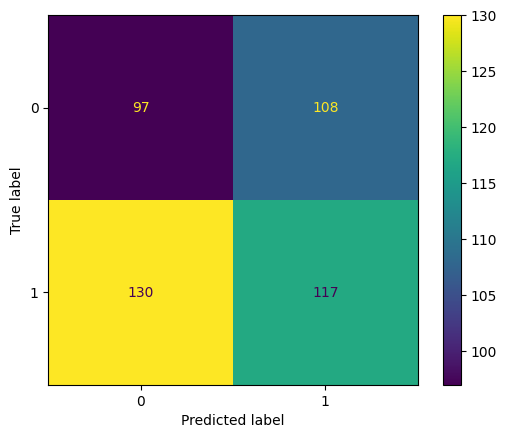

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf, dataset.X_test.drop(columns = col_to_drop))
shap_values = explainer(dataset.X_test.drop(columns = col_to_drop), check_additivity =  False)

<Axes: >

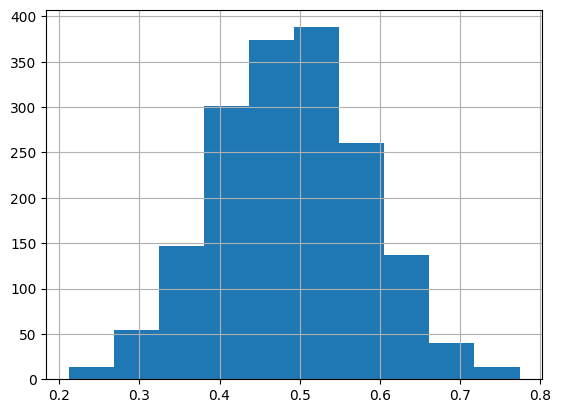

In [ ]:
prediction = clf.predict_proba(dataset.X_test.drop(columns = col_to_drop))
pd.Series(prediction.T[1]).hist()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


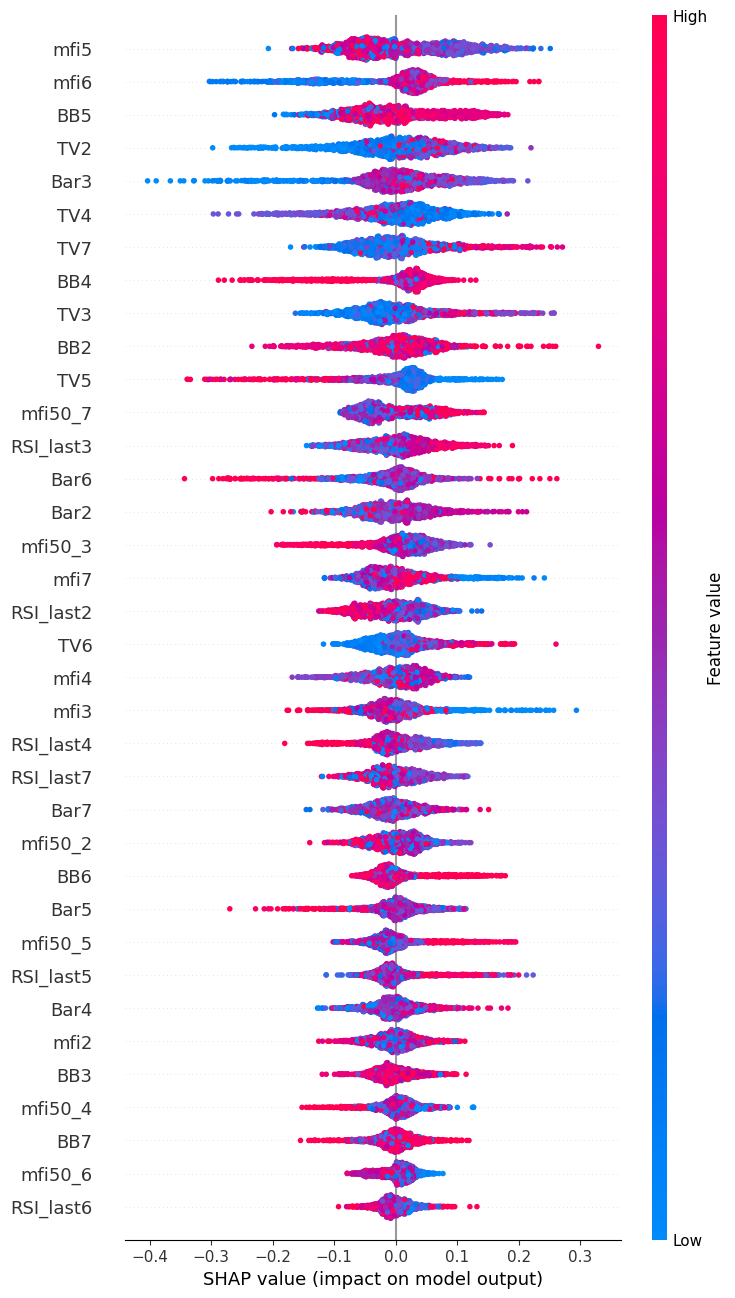

In [ ]:
shap.plots.beeswarm(shap_values, max_display=70)